# SALES PREDICTION USING PYTHON

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset = pd.read_csv("C:\\Users\\visha\\OneDrive\\Documents\\csv\\sales prediction using python task-3.csv")
print(dataset)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [6]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
dataset.shape

(200, 4)

In [9]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
# data cleaning
# checking the null values
dataset.isnull().sum()
# their is no nullvalue

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


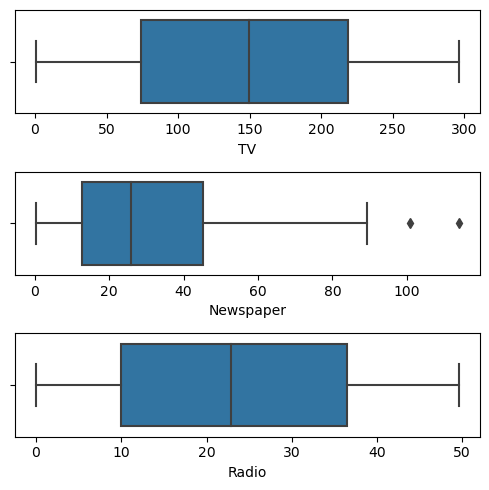

In [14]:
fig,axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


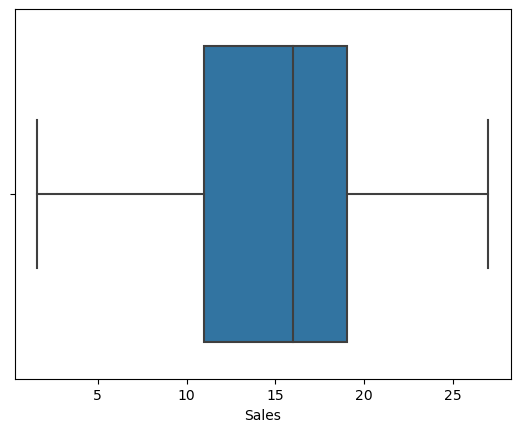

In [16]:
#Exploratory Data Analysis
sns.boxplot(dataset['Sales'])
plt.show()

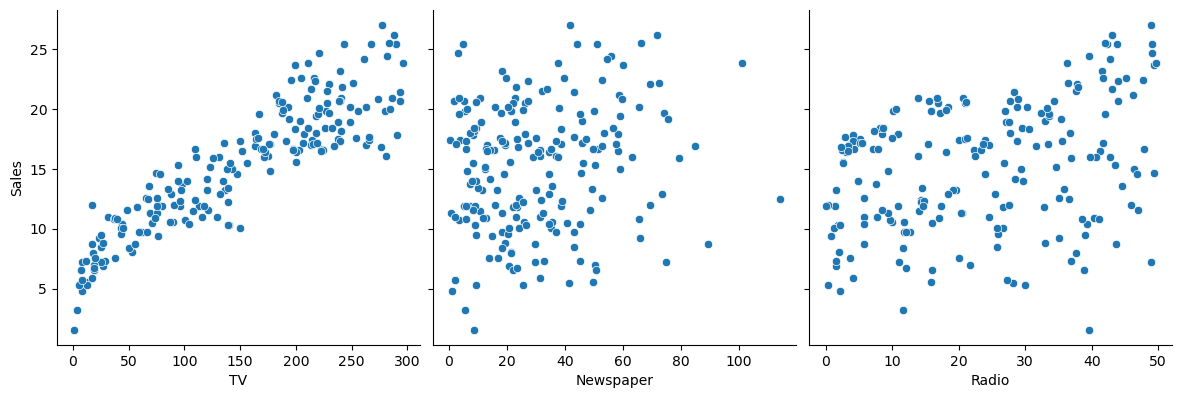

In [20]:
sns.pairplot(dataset, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [21]:
# Model Building
X = dataset['TV']
y = dataset['Sales']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 50)

In [31]:
X_train.shape

(140,)

In [32]:
 y_train.shape

(140,)

In [33]:
import statsmodels.api as sm

In [34]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [35]:
lr.params

const    6.840057
TV       0.057629
dtype: float64

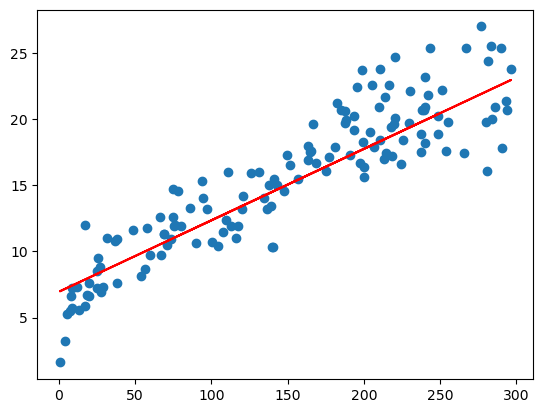

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [38]:
# Model Evaluation
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


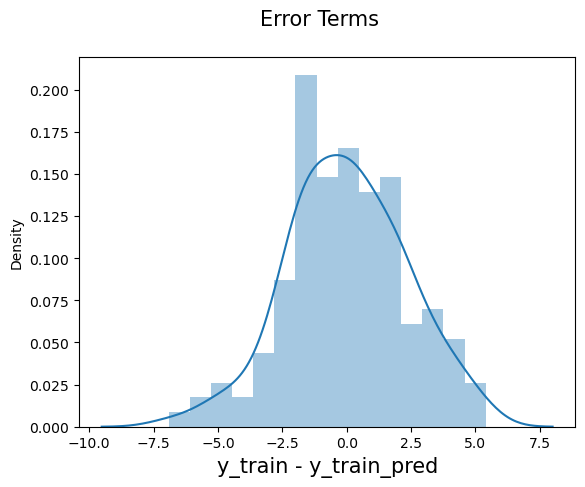

In [40]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('y_train - y_train_pred', fontsize = 15)       
plt.show()

In [41]:
# Prediction on test set
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [42]:
y_pred

112    16.965480
165    20.354067
12      8.211628
73     14.297255
144    12.383971
20     19.426240
199    20.215758
8       7.335667
39     19.979478
88     11.928701
81     20.659501
197    17.040397
69     19.334033
160    16.781067
25     21.990732
99     14.631503
151    13.813171
23     19.996767
138     9.318106
159    14.429802
89     13.167726
82     11.179524
24     10.430346
174    19.656756
137    22.613126
83     10.781883
107    12.049722
34     12.355156
97     17.495667
167    18.757743
123    13.934192
157    15.472887
75      7.813988
152    18.227556
117    11.242916
149     9.416075
63     12.758559
54     21.979206
125    11.865309
80     11.242916
170     9.721509
183    23.414169
38      9.323869
153    16.711912
40     18.509938
190     9.116404
177    16.648520
131    22.123279
13     12.458888
121     7.923483
1       9.404549
116    14.862020
100    19.656756
166     7.871617
168    19.253353
48     19.933375
178    22.786013
108     7.594997
61     21.8985

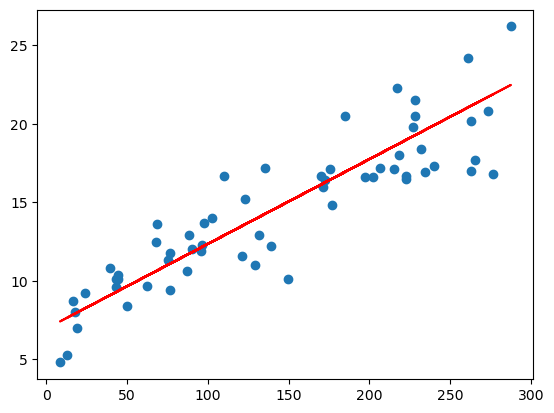

In [43]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()